<a href="https://colab.research.google.com/github/ctate7163/radiometry/blob/main/radiometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Radiometry for exposure time calculation

This notebook estimates the camera design requirements

All quantities are in SI units unless stated otherwise.

Symbols used below.

| Symbol | Name | SI units | Note |
| :-- | ------ | :----- | ------ |
| Q$_e$ | radiant energy | J |  |
| 𝛷$_e$ | radiant flux | W |  |
| I$_e$$_Ω$ | radiant intensity | W/sr |  |
| L$_e$$_Ω$ | radiance | W/sr/m$^2$ |  |
| E$_e$ | irradiance | W/m$^2$ | also flux density |
| M$_e$ | exitance | W/m$^2$ | also emittance |
| Ω | solid angle | sr |  |
| λ | wavelength | meters |  |
| α | albedo |  - | also reflectance |
| T | transmission | - |  |
| S | signal | e$^-$ | detector signal in electrons |
| t | exposure time | sec |  |
| r | radius | m |  |
| d | distance | m |  |
| l | length | m |  |
| A | area | m$^2$ |  |
| QE | quantum efficency | e$^-$/photon |  |
| i | incidence | rad |  |
|  |  |  |  |

See Wikipedia [here](https://en.wikipedia.org/wiki/Radiometry) for notation conventions

Solar spectrum is the E-490-00 standard downloaded from [here](https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
# from astropy.table import Table
# import astropy.units as u

In [3]:
!pip install PySpectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.4 MB/s eta 0:00:00
  Created wheel for PySpectral: filename=pyspectral-0.13.5-py2.py3-none-any.whl size=702045 sha256=7e7d6777041bce70f4fc139831de3e23ad33b372d5098d45065adcd5097438aa
  Stored in directory: /root/.cache/pip/wheels/f7/ab/97/aaee93364f115f1dbed177408b70128ea4af99d8c04e9a3600
Successfully built PySpectral


In [4]:

# Set wavelength range in meters

l_min  = 200e-9
l_max  = 1200e-9
l_bin  = 10e-9

l = np.arange(l_min,l_max,l_bin)

In [19]:
# Get Solar radiance at 1 AU

from pyspectral.solar import SolarIrradianceSpectrum
solar_irr = SolarIrradianceSpectrum()

l_ = solar_irr.wavelength/1e6
E_ = solar_irr.irradiance*1e6
L_ = E_*4*np.pi

from scipy.stats import binned_statistic

def new_irradiance(wavelength, irradiance, new_wavelength):
    wavelength = np.array(wavelength)
    irradiance = np.array(irradiance)

    # Define bin edges spanning the range of the data.
    bins = new_wavelength

    # Use binned_statistic to compute the mean irradiance per bin.
    stat, bin_edges, _ = binned_statistic(wavelength, irradiance, statistic='mean', bins=bins)

    # Compute bin centers from bin edges.
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

    return stat


l_bins = np.arange(l_min-l_bin/2,l_max+l_bin/2,l_bin)
E_1au = new_irradiance( l_, E_, l_bins )
L_1au = new_irradiance( l_, L_, l_bins )

# E = np.interp(l,l_,E_)
# L = np.interp(l,l_,L_)

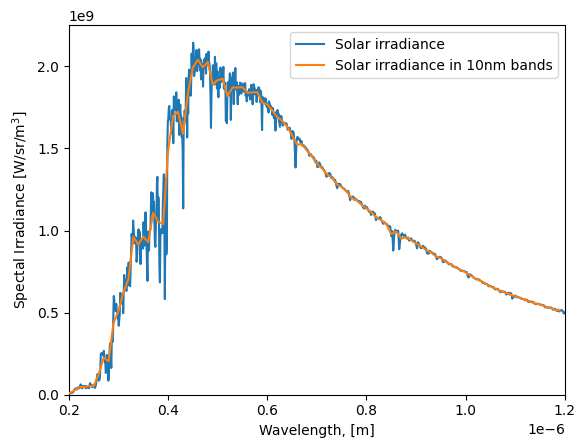

In [23]:
# Plot Solar radiance at 1 AU

plt.plot(l_,E_)
plt.plot(l, E_1au, zorder=10)

plt.xlabel('Wavelength, [m]')
plt.ylabel('Spectal Irradiance [W/sr/m$^3$]')
plt.legend(['Solar irradiance', 'Solar irradiance in 10nm bands', ])
plt.xlim([l_min,l_max])
plt.ylim(bottom=0)
plt.show()


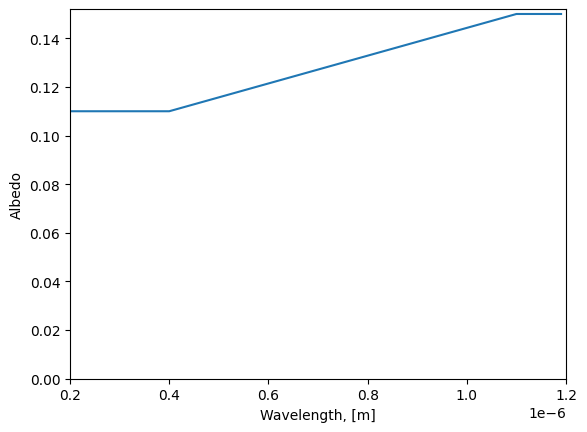

In [35]:
# define target albedo


def albedoSpectrum( v_, r_, l=l):
    l_      = [300e-9,400e-9,1100e-9]
    albedo_ = [v_,v_,r_]
    albedo  = np.interp(l,l_,albedo_)
    return albedo

# Mars
a = albedoSpectrum( 0.05, 0.1, l )

# Psyche
a = albedoSpectrum( 0.11, 0.15, l )

plt.plot(l,a)
plt.xlabel('Wavelength, [m]')
plt.ylabel('Albedo')
plt.xlim([l_min,l_max])
plt.ylim(bottom=0)
plt.show()

In [ ]:
# Transission of optics and filter

In [36]:
# Quantum efficency of detector

pd.read_csv('kai2020_qe.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'kai2020_qe.csv'

In [ ]:
# Values

hc      = 6.62607015e-34 # SI units

L_pixel =
t_exp   =
QE      =

# New Section

(array([1.950e-07, 2.050e-07, 2.150e-07, 2.250e-07, 2.350e-07, 2.450e-07,
        2.550e-07, 2.650e-07, 2.750e-07, 2.850e-07, 2.950e-07, 3.050e-07,
        3.150e-07, 3.250e-07, 3.350e-07, 3.450e-07, 3.550e-07, 3.650e-07,
        3.750e-07, 3.850e-07, 3.950e-07, 4.050e-07, 4.150e-07, 4.250e-07,
        4.350e-07, 4.450e-07, 4.550e-07, 4.650e-07, 4.750e-07, 4.850e-07,
        4.950e-07, 5.050e-07, 5.150e-07, 5.250e-07, 5.350e-07, 5.450e-07,
        5.550e-07, 5.650e-07, 5.750e-07, 5.850e-07, 5.950e-07, 6.050e-07,
        6.150e-07, 6.250e-07, 6.350e-07, 6.450e-07, 6.550e-07, 6.650e-07,
        6.750e-07, 6.850e-07, 6.950e-07, 7.050e-07, 7.150e-07, 7.250e-07,
        7.350e-07, 7.450e-07, 7.550e-07, 7.650e-07, 7.750e-07, 7.850e-07,
        7.950e-07, 8.050e-07, 8.150e-07, 8.250e-07, 8.350e-07, 8.450e-07,
        8.550e-07, 8.650e-07, 8.750e-07, 8.850e-07, 8.950e-07, 9.050e-07,
        9.150e-07, 9.250e-07, 9.350e-07, 9.450e-07, 9.550e-07, 9.650e-07,
        9.750e-07, 9.850e-07, 9.950e-0